In [116]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [117]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [118]:
fetch_housing_data()

In [119]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [120]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Create a Test Set

In [121]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [122]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [123]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [124]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [125]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [126]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Prepare the Data for Machine Learning Algorithms

In [127]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [128]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [129]:
X_train = strat_train_set[["longitude", "latitude", "median_income"]].copy()
X_test = strat_train_set[["longitude", "latitude", "median_income"]].copy()


In [130]:
X_test

,longitude,latitude,median_income
12655,-121.46,38.52,2.1736
15502,-117.23,33.09,6.3373
2908,-119.04,35.37,2.8750
14053,-117.13,32.75,2.2264
20496,-118.70,34.28,4.4964
...,...,...,...
15174,-117.07,33.03,5.0900
12661,-121.42,38.51,2.8139
19263,-122.72,38.44,3.1797
19140,-122.70,38.31,4.1964


## scaled

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.fit_transform(X_test)  

## Train k means

In [132]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_scaled)

cluster_labels = kmeans.predict(X_train_scaled)

print(cluster_labels)

[6 9 5 ... 6 1 6]


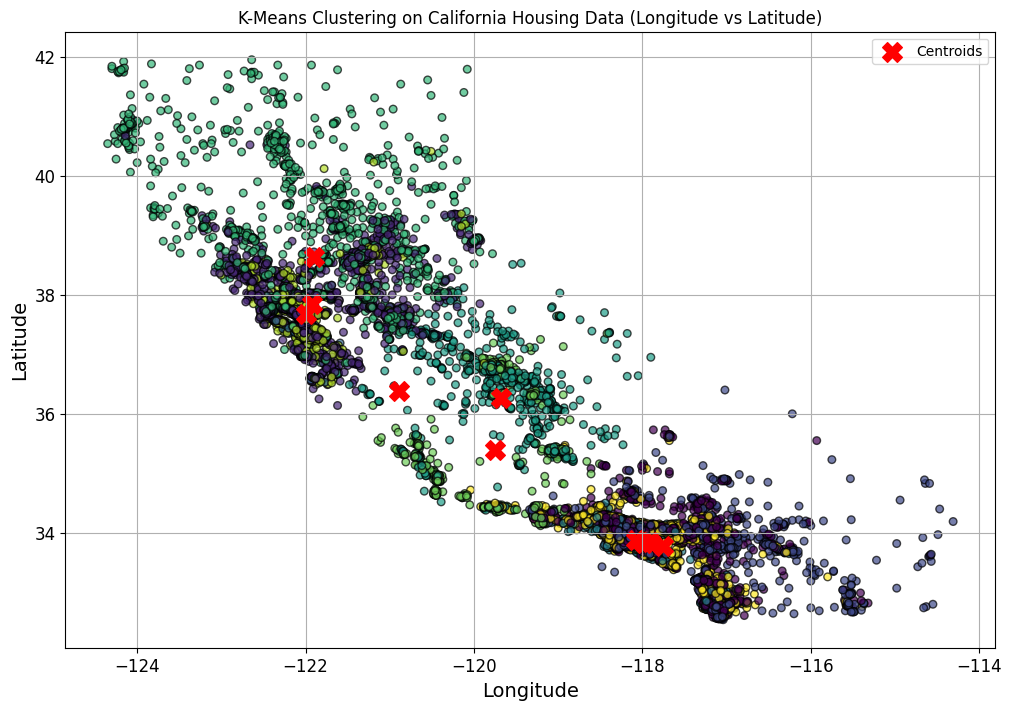

In [133]:
import matplotlib.pyplot as plt

# Transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=test_cluster_labels, cmap='viridis', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()


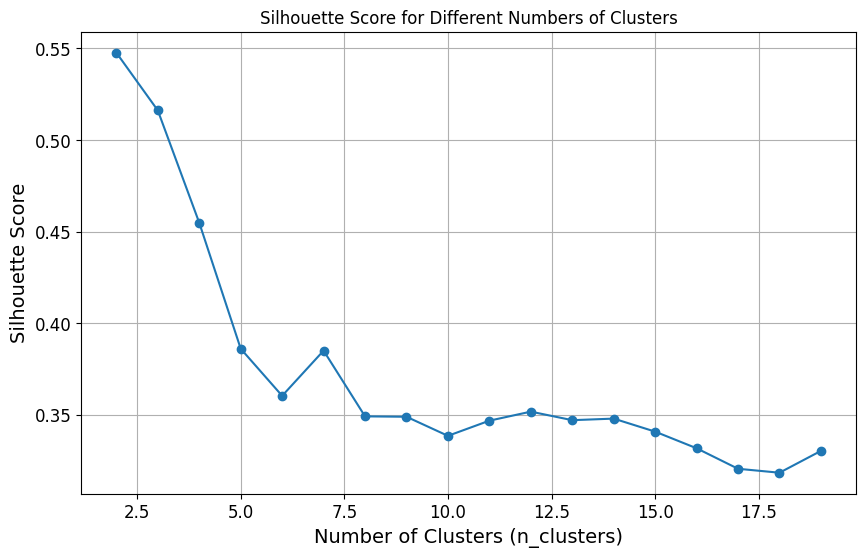

In [140]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Range of cluster numbers to evaluate
cluster_range = range(2, 20)
silhouette_scores = []

# Calculate silhouette score for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled)
    cluster_labels = kmeans.predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [141]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)


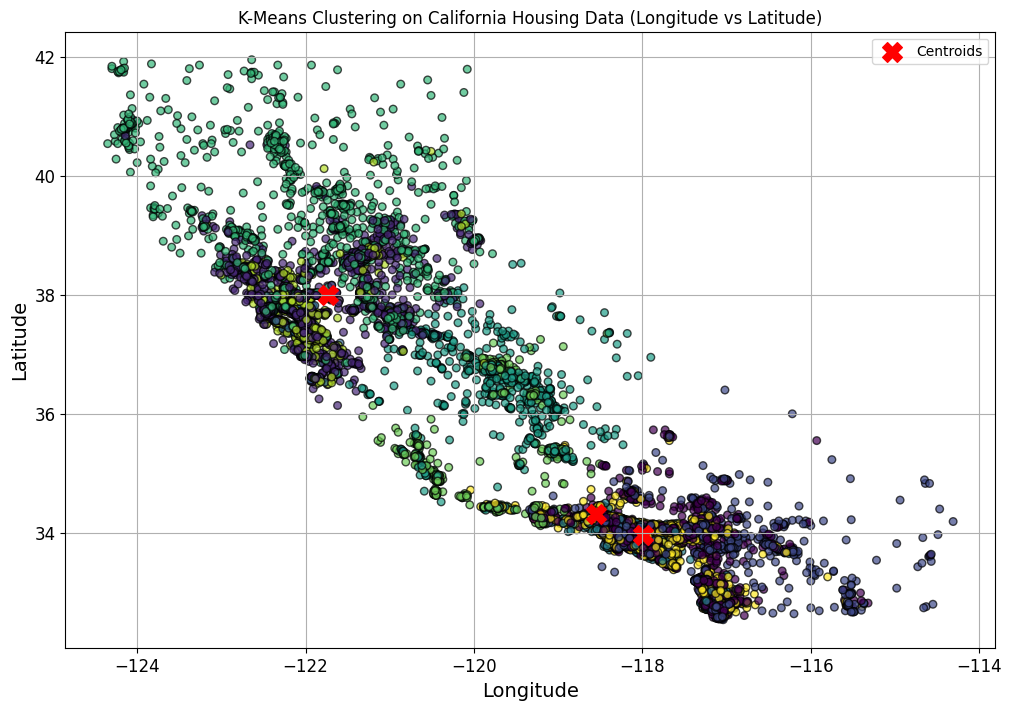

In [142]:
import matplotlib.pyplot as plt

# Transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=test_cluster_labels, cmap='viridis', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

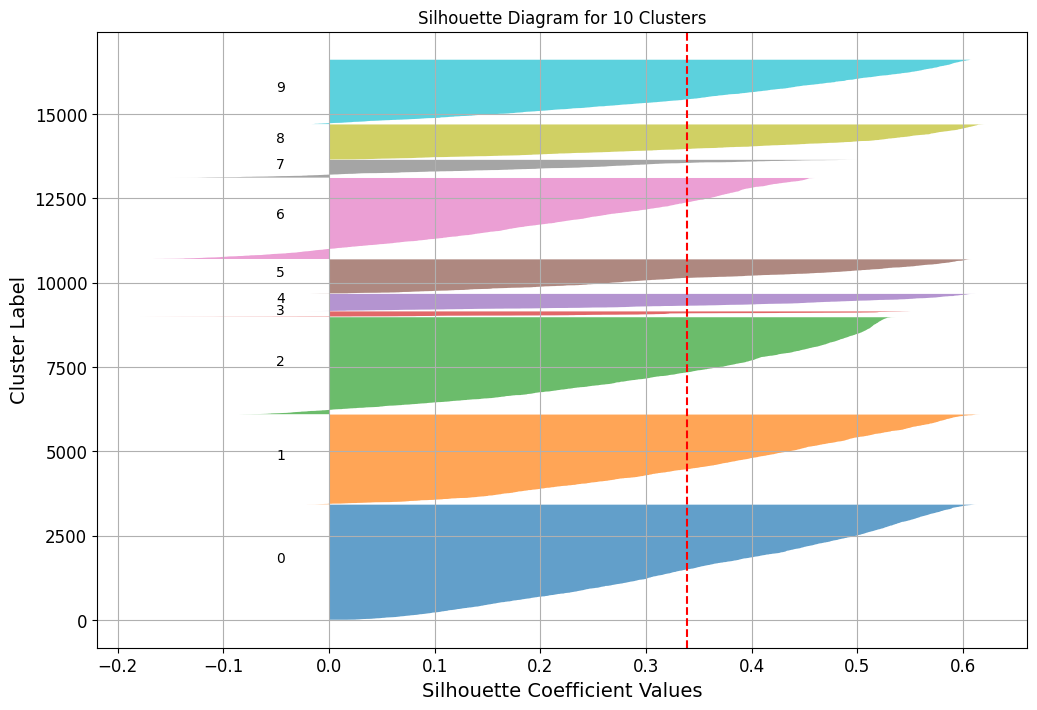

In [150]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

optimal_clusters = 10
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train_scaled)
cluster_labels_optimal = kmeans_optimal.predict(X_train_scaled)

# Calculate the silhouette values for each sample
silhouette_values = silhouette_samples(X_train_scaled, cluster_labels_optimal)

# Plotting the silhouette diagram
plt.figure(figsize=(12, 8))
y_lower = 10
for i in range(optimal_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = silhouette_values[cluster_labels_optimal == i]
    ith_cluster_silhouette_values.sort()
    
    # Compute the y_upper for this cluster
    y_upper = y_lower + len(ith_cluster_silhouette_values)
    
    # Fill the silhouette values for this cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_values), str(i))
    
    # Update the y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples gap between plots

# Draw a vertical line for the average silhouette score of all the values
average_score = silhouette_score(X_train_scaled, cluster_labels_optimal)
plt.axvline(x=average_score, color="red", linestyle="--")

plt.title(f'Silhouette Diagram for {optimal_clusters} Clusters')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.grid()
plt.show()


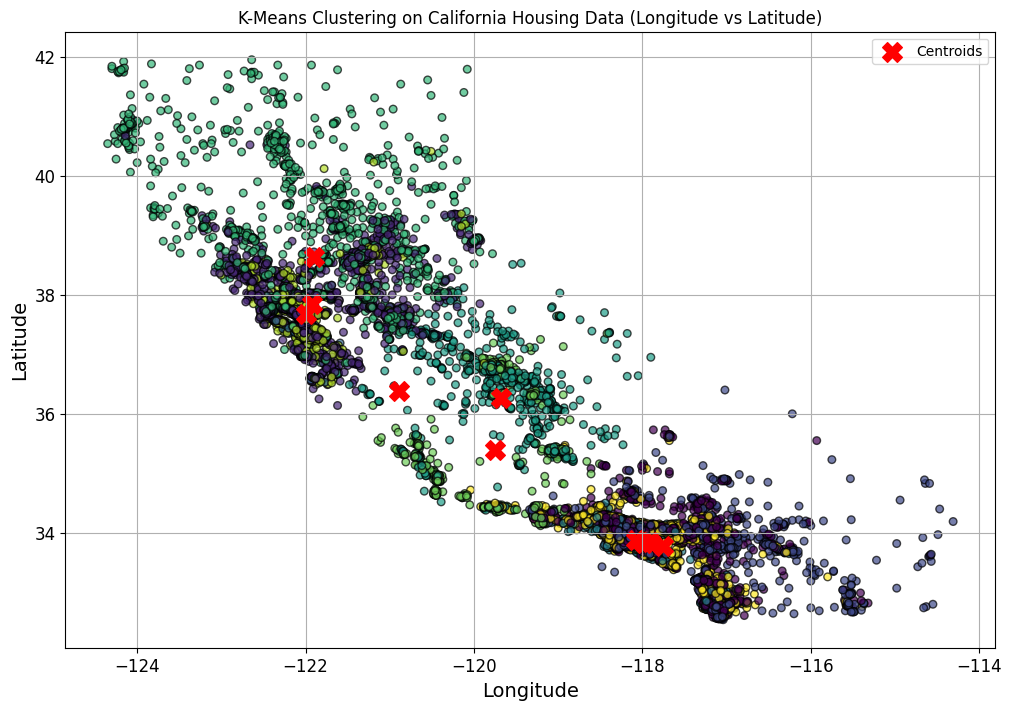

In [151]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)

import matplotlib.pyplot as plt

# Transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=test_cluster_labels, cmap='viridis', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

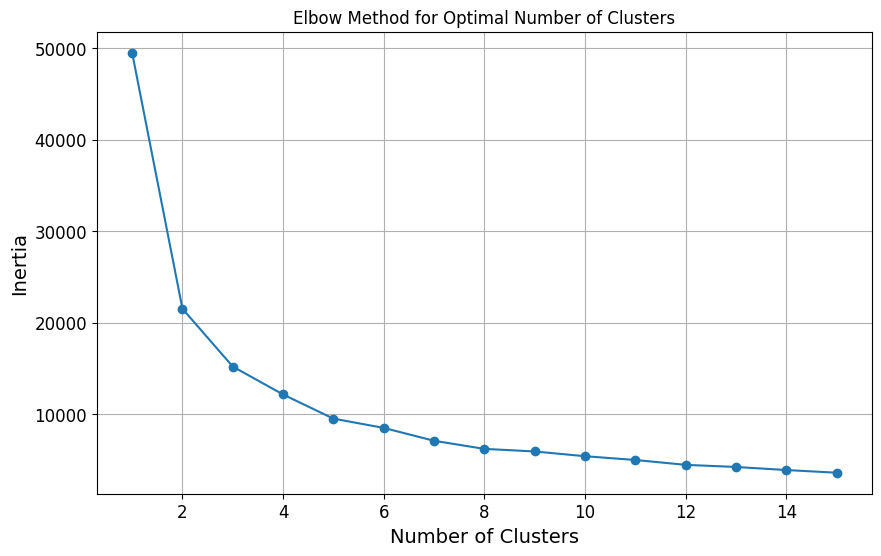

In [152]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_range = range(1, 16)
inertias = []

# Calculate the inertia for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled)  # Use your scaled data
    inertias.append(kmeans.inertia_)

# Plot the inertia for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


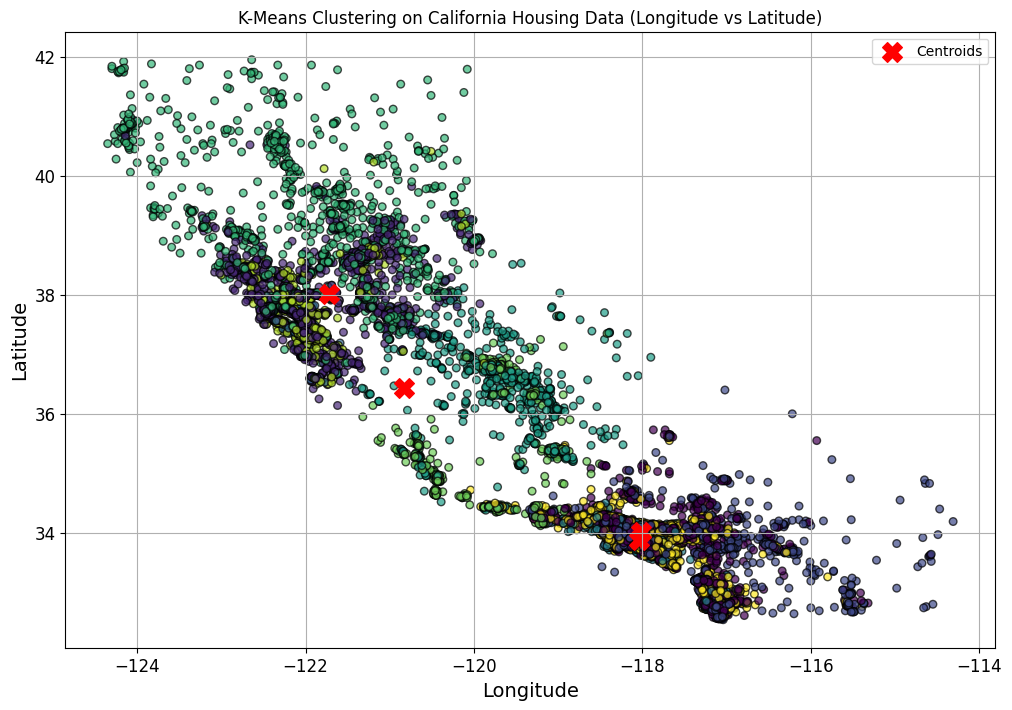

In [153]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)

import matplotlib.pyplot as plt

# Transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=test_cluster_labels, cmap='viridis', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

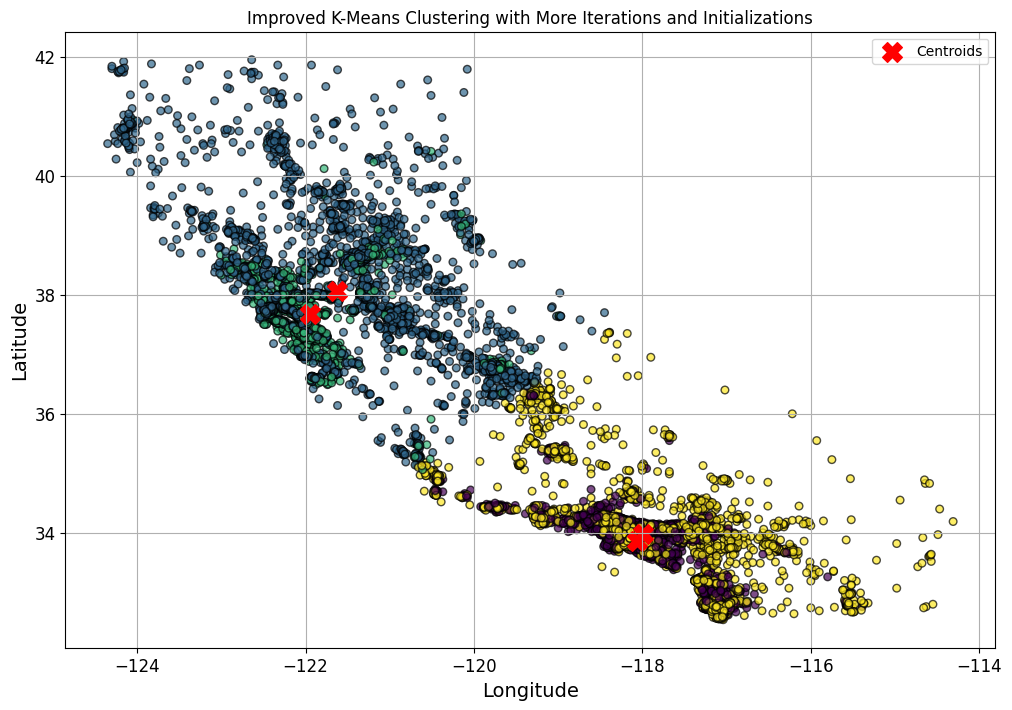

In [156]:
from sklearn.cluster import KMeans

# Increase the number of iterations and restarts
kmeans = KMeans(
    n_clusters=4,        # Number of clusters as determined by the Elbow Method
    max_iter=5000,        # Increase maximum number of iterations
    n_init=20,           # Increase the number of initializations to choose the best one
    random_state=42      # Ensure reproducibility
)

# Fit the model
kmeans.fit(X_train_scaled)

# Predict cluster labels
cluster_labels = kmeans.predict(X_train_scaled)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Optional: Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=cluster_labels, cmap='viridis', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Improved K-Means Clustering with More Iterations and Initializations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()


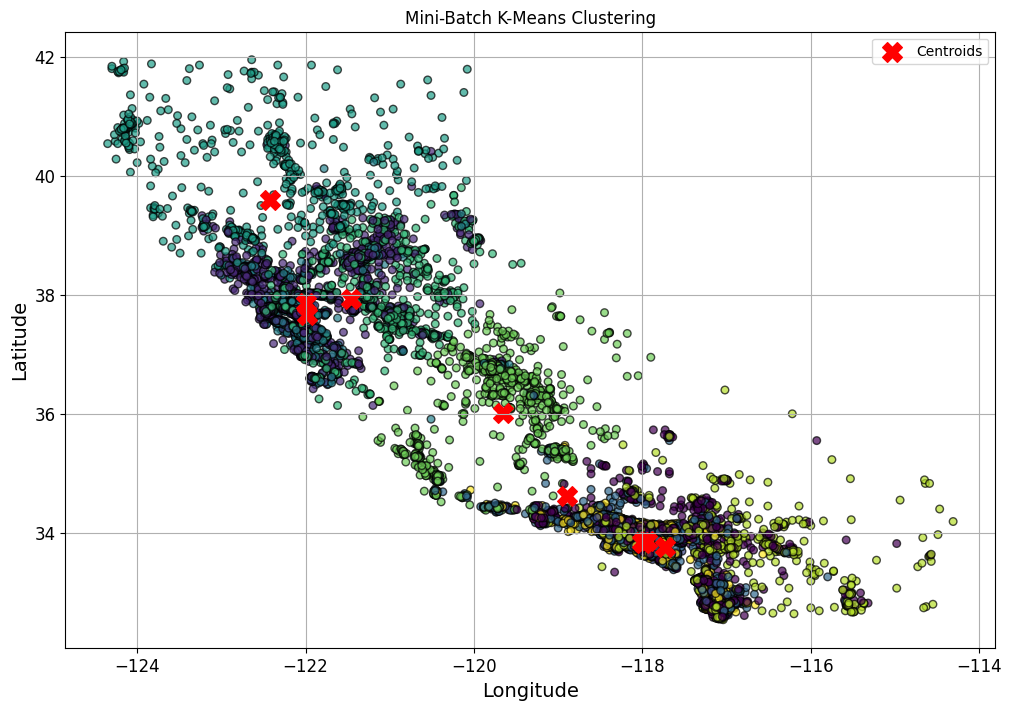

In [161]:
from sklearn.cluster import MiniBatchKMeans

# Initialize Mini-Batch K-Means with the same number of clusters and parameters
minibatch_kmeans = MiniBatchKMeans(
    n_clusters=10,         # Number of clusters
    max_iter=5000,         # Maximum number of iterations
    batch_size=100,       # Size of the mini-batches
    n_init=20,            # Number of initializations
    random_state=42       # Ensure reproducibility
)

# Fit the Mini-Batch K-Means model
minibatch_kmeans.fit(X_train_scaled)

# Predict the cluster labels
minibatch_cluster_labels = minibatch_kmeans.predict(X_train_scaled)
centroids_original = scaler.inverse_transform(minibatch_kmeans.cluster_centers_)


# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=minibatch_cluster_labels, cmap='viridis', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Mini-Batch K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()


In [159]:
print(f'Inertia for Standard K-Means: {kmeans.inertia_:.2f}')

print(f'Inertia for Mini-Batch K-Means: {minibatch_kmeans.inertia_:.2f}')

Inertia for Standard K-Means: 11677.84
Inertia for Mini-Batch K-Means: 11822.53


In [162]:
from sklearn.metrics import silhouette_score

# Silhouette score for standard K-Means
kmeans_silhouette = silhouette_score(X_train_scaled, cluster_labels)
print(f'Silhouette Score for Standard K-Means: {kmeans_silhouette:.3f}')

# Silhouette score for Mini-Batch K-Means
minibatch_silhouette = silhouette_score(X_train_scaled, minibatch_cluster_labels)
print(f'Silhouette Score for Mini-Batch K-Means: {minibatch_silhouette:.3f}')


Silhouette Score for Standard K-Means: 0.434
Silhouette Score for Mini-Batch K-Means: 0.320
